##  Изучим данные

In [ ]:
import numpy as np
import pandas as pd

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm # color map
%matplotlib inline


data_one = pd.read_excel("datasets/X_bp.xlsx", index_col="Unnamed: 0")
data_two = pd.read_excel("datasets/X_nup.xlsx", index_col="Unnamed: 0")
df = data_one.join(data_two, how='inner')


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from fcmeans import FCM
from sklearn.metrics import silhouette_score 

%matplotlib inline 

In [ ]:
df.info()

In [29]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Соотношение матрица-наполнитель,1023.0,2.930366,0.913222,0.389403,2.317887,2.906878,3.552660,5.591742
"Плотность, кг/м3",1023.0,1975.734888,73.729231,1731.764635,1924.155467,1977.621657,2021.374375,2207.773481
"модуль упругости, ГПа",1023.0,739.923233,330.231581,2.436909,500.047452,739.664328,961.812526,1911.536477
"Количество отвердителя, м.%",1023.0,110.570769,28.295911,17.740275,92.443497,110.564840,129.730366,198.953207
"Содержание эпоксидных групп,%_2",1023.0,22.244390,2.406301,14.254985,20.608034,22.230744,23.961934,33.000000
"Температура вспышки, С_2",1023.0,285.882151,40.943260,100.000000,259.066528,285.896812,313.002106,413.273418
"Поверхностная плотность, г/м2",1023.0,482.731833,281.314690,0.603740,266.816645,451.864365,693.225017,1399.542362
"Модуль упругости при растяжении, ГПа",1023.0,73.328571,3.118983,64.054061,71.245018,73.268805,75.356612,82.682051
"Прочность при растяжении, МПа",1023.0,2466.922843,485.628006,1036.856605,2135.850448,2459.524526,2767.193119,3848.436732
"Потребление смолы, г/м2",1023.0,218.423144,59.735931,33.803026,179.627520,219.198882,257.481724,414.590628


In [ ]:
df_mu=df[df['Модуль упругости при растяжении, ГПа']%0.25 == 0]


In [ ]:
plt.scatter(df['Шаг нашивки', 
               'Модуль упругости при растяжении, ГПа', 
               'Поверхностная плотность, г/м2',
              'Температура вспышки, С_2',
              'Содержание эпоксидных групп,%_2',
              'Количество отвердителя, м.%',
              'модуль упругости, ГПа',
              ])

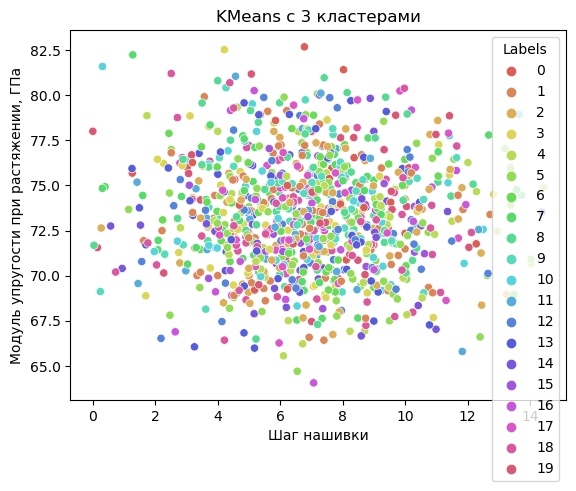

In [26]:
X =df.drop(['Плотность нашивки', 'Угол нашивки, град', 'Потребление смолы, г/м2', ])

km3 = KMeans(n_clusters=20).fit(X)
X['Labels'] = km3.labels_

sns.scatterplot(x=X['Шаг нашивки'], y=X['Модуль упругости при растяжении, ГПа'], hue=X['Labels'], palette=sns.color_palette('hls', 20))

plt.title('KMeans c 3 кластерами')
plt.show()

In [ ]:
df[df['Прочность при растяжении, МПа']%0.25 == 0]

plt.figure(figsize=(10,5))
plt.title('Поиск зависимостей', size=15)
plt.scatter(df_mu['Соотношение матрица-наполнитель'], df_mu['Прочность при растяжении, МПа'])
# plt.xlabel('Прочность при растяжении, МПа', size=12)
# plt.ylabel('Модуль упругости при растяжении, ГПа', size=12)
plt.show()

In [ ]:
df[df['Прочность при растяжении, МПа']%0.25 == 0]

In [ ]:
df.sort_values(['Шаг нашивки'])

In [ ]:
df.describe().T

In [ ]:
df[df['модуль упругости, ГПа']%0.25 ==0]

In [ ]:
df[df['Содержание эпоксидных групп,%_2']%0.25 ==0]

In [ ]:
sns.pairplot(df[df['Содержание эпоксидных групп,%_2']%0.25 ==0])

In [ ]:
df[df['Модуль упругости при растяжении, ГПа']%0.25 ==0]

In [ ]:
df[df['Содержание эпоксидных групп,%_2']%0.25 ==0]

In [ ]:

def jpinData(datasets):
    result = pd.concat(datasets)
    return result


data = [
    df[df['Шаг нашивки']%0.25 ==0],
    df[df['Количество отвердителя, м.%']%0.25 ==0]
]

new_data = jpinData(data)

In [ ]:
df[round(df['Соотношение матрица-наполнитель'], 2)==round(df['Соотношение матрица-наполнитель'].mean(), 2)]
# df['Соотношение матрица-наполнитель'].mean()
df[round(df['модуль упругости, ГПа'], 2)==round(df['модуль упругости, ГПа'].mean(), 2)]

df[round(df['Модуль упругости при растяжении, ГПа'], 2)==round(df['Модуль упругости при растяжении, ГПа'].mean(), 2)]

df[round(df['Шаг нашивки'], 2)==round(df['Шаг нашивки'].mean(), 2)]

df[round(df['Плотность нашивки'], 2)==round(df['Плотность нашивки'].mean(), 2)]


In [ ]:
df[df['Количество отвердителя, м.%']%0.25 ==0]
# df[df['Содержание эпоксидных групп,%_2']%0.25 ==0]
df[df['модуль упругости, ГПа']%0.25 ==0]
df[df['Соотношение матрица-наполнитель']%0.25 ==0]

In [ ]:
one = df[df['Шаг нашивки']%0.25 ==0]
# two = one[one['Потребление смолы, г/м2']%0.25 ==0]
# three = two[two['Количество отвердителя, м.%']%0.25 ==0]
# three.sort_values('Соотношение матрица-наполнитель')

In [ ]:
row = 3
col = 5
index = 1
plt.figure(figsize=(35,15))
for column in one.columns:
    plt.subplot(row, col, index)
    sns.histplot(data = one[column], kde=True)
    plt.title(column, size = 20)   
    index+=1
plt.show()

In [ ]:
mask = np.triu(one.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(one.corr(), mask=mask, annot=True, square=True, cmap='Reds')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
sns.pairplot(three)

In [ ]:
df[df['Прочность при растяжении, МПа']%0.25 ==0]

In [ ]:
step = df[df['Шаг нашивки']%0.25==0]
plot57 = step[step['Плотность нашивки'] == 57]
plot60 = step[step['Плотность нашивки'] == 60]
plot70 = step[step['Плотность нашивки'] == 70]

In [ ]:
ugol0 = step[step['Угол нашивки, град'] == 0]

In [ ]:
ugol90 = step[step['Угол нашивки, град'] == 90]

In [ ]:
# Соотношение матрица-наполнитель
df['Соотношение матрица-наполнитель']
df.describe()

In [ ]:
sns.pairplot(ugol0)

In [ ]:
plot57

In [ ]:
df.nunique

In [ ]:
df[df['Плотность, кг/м3']%0.25 ==0]
df[df['Количество отвердителя, м.%']%0.25 ==0]
one = df[df['Шаг нашивки']%0.25 ==0]
two = one[one['Модуль упругости при растяжении, ГПа']%0.25 ==0]
three = two[two['Прочность при растяжении, МПа']%0.25 ==0]
three
two

In [ ]:
mask = np.triu(one.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(one.corr(), mask=mask, annot=True, square=True, cmap='Reds')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
shag5_7 = df[(df['Шаг нашивки']>=5) & (df['Шаг нашивки']<=7)]

plot_nassh60_70 = df[(df['Плотность нашивки']>=60) & (df['Плотность нашивки']<=70)]

combine = df[(df['Шаг нашивки']>=4) & (df['Шаг нашивки']<=5) & (df['Плотность нашивки']>=60) & (df['Плотность нашивки']<=70)]


In [ ]:
combine

In [ ]:
for i in plot_nassh60_70['Плотность нашивки']:
    print(i)

In [ ]:
print(df[(df['Шаг нашивки']>=5) & (df['Шаг нашивки']<=7)]['Шаг нашивки'])
for i in df[(df['Шаг нашивки']>=5) & (df['Шаг нашивки']<=7)]['Шаг нашивки']:
    print(i)

In [ ]:
np.linspace(5,7, 27)

In [ ]:
combine

In [ ]:
one = df[df['Шаг нашивки']%0.25 ==0]

In [ ]:
two = one[one['Угол нашивки, град'] == 0]

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Поиск зависимостей', size=15)
plt.scatter(two['Соотношение матрица-наполнитель'], two['Модуль упругости при растяжении, ГПа'])
# plt.xlabel('Прочность при растяжении, МПа', size=12)
# plt.ylabel('Модуль упругости при растяжении, ГПа', size=12)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
two_norm_min_max = pd.DataFrame(min_max_scaler.fit_transform(two), columns = two.columns, index=two.index)

In [ ]:
two_norm_min_max
plt.figure(figsize=(10,5))
plt.title('Поиск зависимостей', size=15)
plt.scatter(two_norm_min_max['Соотношение матрица-наполнитель'], two_norm_min_max['Модуль упругости при растяжении, ГПа'])
# plt.xlabel('Прочность при растяжении, МПа', size=12)
# plt.ylabel('Модуль упругости при растяжении, ГПа', size=12)
plt.show()

In [ ]:
sns.pairplot(two_norm_min_max)

In [ ]:
mask = np.triu(two_norm_min_max.corr())
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(two_norm_min_max.corr(), mask=mask, annot=True, square=True, cmap='Reds')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
plt.scatter(two_norm_min_max['Соотношение матрица-наполнитель'], two_norm_min_max['Модуль упругости при растяжении, ГПа'])

In [ ]:
sorted_val = two_norm_min_max.sort_values("Соотношение матрица-наполнитель")

In [ ]:
plt.plot(sorted_val['Соотношение матрица-наполнитель'], sorted_val['Модуль упругости при растяжении, ГПа'])

In [ ]:
two_norm_min_max.drop('Шаг нашивки', axis=1)

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor

print(sklearn.__version__)

In [ ]:
x_uprug = two_norm_min_max.drop(['Модуль упругости при растяжении, ГПа'], axis=1)
x_proch = two_norm_min_max.drop(['Прочность при растяжении, МПа'], axis=1)
y_uprug = two_norm_min_max[['Модуль упругости при растяжении, ГПа']]
y_proch = two_norm_min_max[['Прочность при растяжении, МПа']]

# Коэффициенты MinMaxScaler для модуля упругости и прочности
min_max_scaler_proch = min_max_scaler.scale_[8]
min_max_scaler_uprug = min_max_scaler.scale_[7]


X_train_uprug, X_test_uprug, y_train_uprug, y_test_uprug = train_test_split(x_uprug, y_uprug, test_size=0.5, random_state=1)
X_train_proch, X_test_proch, y_train_proch, y_test_proch = train_test_split(x_proch, y_proch, test_size=0.5, random_state=1)

In [ ]:
X_test_uprug

In [ ]:
lr = LinearRegression()
lr_params = {
    'fit_intercept' : ['True', 'False']
}
GSCV_lr_uprug = GridSearchCV(lr, lr_params, n_jobs=-1, cv=2)
GSCV_lr_uprug.fit(X_train_uprug, y_train_uprug)
GSCV_lr_uprug.best_params_

In [ ]:
lr_uprug = GSCV_lr_uprug.best_estimator_
print(f'R2-score LR для модуля упругости при растяжении: {lr_uprug.score(X_test_uprug, y_test_uprug).round(3)}')
print(f'MAE: {mean_absolute_error(y_test_uprug, lr_uprug.predict(X_test_uprug))/min_max_scaler_uprug}')

In [ ]:
# Прочность при растяжении
GSCV_lr_proch = GridSearchCV(lr, lr_params, n_jobs=-1, cv=2)
GSCV_lr_proch.fit(X_train_proch, y_train_proch)
GSCV_lr_proch.best_params_

In [ ]:
lr_proch = GSCV_lr_proch.best_estimator_
print(f'R2-score LR для прочности при растяжении: {lr_proch.score(X_test_proch, y_test_proch).round(3)}')
print(f'MAE: {mean_absolute_error(y_test_proch, lr_proch.predict(X_test_proch))/min_max_scaler_proch}')